# Convolutional Neural Networks: Emotion and sign language detector

<a name='1'></a>
## 1 - Packages

As usual, begin by loading in the packages.

In [1]:
### v1.1

In [2]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
import scipy
from PIL import Image
import pandas as pd
import tensorflow as tf
import tensorflow.keras.layers as tfl
from tensorflow.python.framework import ops
from cnn_utils import *
from test_utils import summary, comparator

%matplotlib inline
np.random.seed(1)

<a name='1-1'></a>
### 1.1 - Load the Data and Split the Data into Train/Test Sets

In [3]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_happy_dataset()

# Normalize image vectors
X_train = X_train_orig/255.
X_test = X_test_orig/255.

# Reshape
Y_train = Y_train_orig.T
Y_test = Y_test_orig.T

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (600, 1)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150, 1)


You can display the images contained in the dataset. Images are **64x64** pixels in RGB format (3 channels).

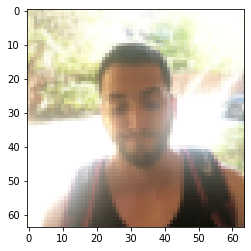

In [4]:
index = 124
plt.imshow(X_train_orig[index]) #display sample training image
plt.show()

### happyModel

In [5]:
def happyModel():
    """
    Implements the forward propagation for the binary classification model:
    ZEROPAD2D -> CONV2D -> BATCHNORM -> RELU -> MAXPOOL -> FLATTEN -> DENSE
    
    Note that for simplicity and grading purposes, you'll hard-code all the values
    such as the stride and kernel (filter) sizes. 
    Normally, functions should take these values as function parameters.
    
    Arguments:
    None

    Returns:
    model -- TF Keras model (object containing the information for the entire training process) 
    """
    model = tf.keras.Sequential([
            ## ZeroPadding2D with padding 3, input shape of 64 x 64 x 3
            tf.keras.layers.ZeroPadding2D(padding=(3,3),input_shape=(64, 64, 3), data_format="channels_last"),
            ## Conv2D with 32 7x7 filters and stride of 1
            tf.keras.layers.Conv2D(32, (7, 7), strides = (1, 1), name = 'conv0'),
            ## BatchNormalization for axis 3
            tf.keras.layers.BatchNormalization(axis = 3, name = 'bn0'),
            ## ReLU
            tf.keras.layers.ReLU(max_value=None, negative_slope=0.0, threshold=0.0),
            ## Max Pooling 2D with default parameters
            tf.keras.layers.MaxPooling2D((2, 2), name='max_pool0'),
            ## Flatten layer
            tf.keras.layers.Flatten(),
            ## Dense layer with 1 unit for output & 'sigmoid' activation
            tf.keras.layers.Dense(1, activation='sigmoid', name='fc'),
        ])
    
    return model

In [6]:
happy_model = happyModel()
# Print a summary for each layer
for layer in summary(happy_model):
    print(layer)
    
output = [['ZeroPadding2D', (None, 70, 70, 3), 0, ((3, 3), (3, 3))],
            ['Conv2D', (None, 64, 64, 32), 4736, 'valid', 'linear', 'GlorotUniform'],
            ['BatchNormalization', (None, 64, 64, 32), 128],
            ['ReLU', (None, 64, 64, 32), 0],
            ['MaxPooling2D', (None, 32, 32, 32), 0, (2, 2), (2, 2), 'valid'],
            ['Flatten', (None, 32768), 0],
            ['Dense', (None, 1), 32769, 'sigmoid']]
    
comparator(summary(happy_model), output)

['ZeroPadding2D', (None, 70, 70, 3), 0, ((3, 3), (3, 3))]
['Conv2D', (None, 64, 64, 32), 4736, 'valid', 'linear', 'GlorotUniform']
['BatchNormalization', (None, 64, 64, 32), 128]
['ReLU', (None, 64, 64, 32), 0]
['MaxPooling2D', (None, 32, 32, 32), 0, (2, 2), (2, 2), 'valid']
['Flatten', (None, 32768), 0]
['Dense', (None, 1), 32769, 'sigmoid']
All tests passed!


#### Expected Output:

```
['ZeroPadding2D', (None, 70, 70, 3), 0, ((3, 3), (3, 3))]
['Conv2D', (None, 64, 64, 32), 4736, 'valid', 'linear', 'GlorotUniform']
['BatchNormalization', (None, 64, 64, 32), 128]
['ReLU', (None, 64, 64, 32), 0]
['MaxPooling2D', (None, 32, 32, 32), 0, (2, 2), (2, 2), 'valid']
['Flatten', (None, 32768), 0]
['Dense', (None, 1), 32769, 'sigmoid']
All tests passed!
```

In [7]:
happy_model.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

In [8]:
happy_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d (ZeroPadding2 (None, 70, 70, 3)         0         
_________________________________________________________________
conv0 (Conv2D)               (None, 64, 64, 32)        4736      
_________________________________________________________________
bn0 (BatchNormalization)     (None, 64, 64, 32)        128       
_________________________________________________________________
re_lu (ReLU)                 (None, 64, 64, 32)        0         
_________________________________________________________________
max_pool0 (MaxPooling2D)     (None, 32, 32, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 32768)             0         
_________________________________________________________________
fc (Dense)                   (None, 1)                 3

<a name='3-2'></a>
### 3.2 - Train and Evaluate the Model

In [9]:
happy_model.fit(X_train, Y_train, epochs=10, batch_size=16)

Epoch 1/10
38/38 [==============================] - 4s 95ms/step - loss: 0.7079 - accuracy: 0.7633
Epoch 2/10
38/38 [==============================] - 4s 92ms/step - loss: 0.4689 - accuracy: 0.8500
Epoch 3/10
38/38 [==============================] - 3s 92ms/step - loss: 0.1976 - accuracy: 0.9267
Epoch 4/10
38/38 [==============================] - 3s 92ms/step - loss: 0.1458 - accuracy: 0.9467
Epoch 5/10
38/38 [==============================] - 3s 92ms/step - loss: 0.1799 - accuracy: 0.9417
Epoch 6/10
38/38 [==============================] - 3s 92ms/step - loss: 0.0810 - accuracy: 0.9700
Epoch 7/10
38/38 [==============================] - 3s 92ms/step - loss: 0.0744 - accuracy: 0.9733
Epoch 8/10
38/38 [==============================] - 3s 90ms/step - loss: 0.0985 - accuracy: 0.9650
Epoch 9/10
38/38 [==============================] - 4s 92ms/step - loss: 0.0859 - accuracy: 0.9700
Epoch 10/10
38/38 [==============================] - 4s 92ms/step - loss: 0.1351 - accuracy: 0.9550


In [10]:
happy_model.evaluate(X_test, Y_test)

5/5 [==============================] - 0s 29ms/step - loss: 0.7894 - accuracy: 0.8200


[0.7894350290298462, 0.8199999928474426]

<a name='4-1'></a>
### 4.1 - Load the SIGNS Dataset

As a reminder, the SIGNS dataset is a collection of 6 signs representing numbers from 0 to 5.

In [11]:
# Loading the data (signs)
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_signs_dataset()

<img src="images/SIGNS.png" style="width:800px;height:300px;">

The next cell will show you an example of a labelled image in the dataset. Feel free to change the value of `index` below and re-run to see different examples. 

y = 4


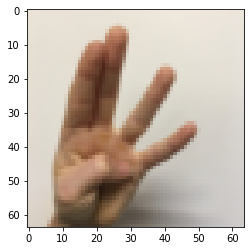

In [12]:
# Example of an image from the dataset
index = 9
plt.imshow(X_train_orig[index])
print ("y = " + str(np.squeeze(Y_train_orig[:, index])))

<a name='4-2'></a>
### 4.2 - Split the Data into Train/Test Sets

In [13]:
X_train = X_train_orig/255.
X_test = X_test_orig/255.
Y_train = convert_to_one_hot(Y_train_orig, 6).T
Y_test = convert_to_one_hot(Y_test_orig, 6).T
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 1080
number of test examples = 120
X_train shape: (1080, 64, 64, 3)
Y_train shape: (1080, 6)
X_test shape: (120, 64, 64, 3)
Y_test shape: (120, 6)


<a name='4-3'></a>
### 4.3 - Forward Propagation

<a name='ex-2'></a>
### convolutional_model

In [14]:
def convolutional_model(input_shape):
    """
    Implements the forward propagation for the model:
    CONV2D -> RELU -> MAXPOOL -> CONV2D -> RELU -> MAXPOOL -> FLATTEN -> DENSE
    
    Note that for simplicity and grading purposes, you'll hard-code some values
    such as the stride and kernel (filter) sizes. 
    Normally, functions should take these values as function parameters.
    
    Arguments:
    input_img -- input dataset, of shape (input_shape)

    Returns:
    model -- TF Keras model (object containing the information for the entire training process) 
    """

    input_img = tf.keras.Input(shape=input_shape)
    Z1 = tf.keras.layers.Conv2D(filters = 8 , kernel_size= (4,4), strides = (1,1), padding='same')(input_img)
    A1 = tf.keras.layers.ReLU()(Z1)
    P1 = tf.keras.layers.MaxPool2D(pool_size=(8,8), strides=(8, 8), padding='same')(A1)
    Z2 = tf.keras.layers.Conv2D(filters = 16 , kernel_size= (2,2), strides = (1,1), padding='same')(P1)
    A2 = tf.keras.layers.ReLU()(Z2)
    P2 = tf.keras.layers.MaxPool2D(pool_size=(4,4), strides=(4, 4), padding='same')(A2)
    F = tf.keras.layers.Flatten()(P2)
    outputs = tf.keras.layers.Dense(units=6, activation='softmax')(F)
    model = tf.keras.Model(inputs=input_img, outputs=outputs)
    return model

In [15]:
conv_model = convolutional_model((64, 64, 3))
conv_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
conv_model.summary()
    
output = [['InputLayer', [(None, 64, 64, 3)], 0],
        ['Conv2D', (None, 64, 64, 8), 392, 'same', 'linear', 'GlorotUniform'],
        ['ReLU', (None, 64, 64, 8), 0],
        ['MaxPooling2D', (None, 8, 8, 8), 0, (8, 8), (8, 8), 'same'],
        ['Conv2D', (None, 8, 8, 16), 528, 'same', 'linear', 'GlorotUniform'],
        ['ReLU', (None, 8, 8, 16), 0],
        ['MaxPooling2D', (None, 2, 2, 16), 0, (4, 4), (4, 4), 'same'],
        ['Flatten', (None, 64), 0],
        ['Dense', (None, 6), 390, 'softmax']]
    
comparator(summary(conv_model), output)

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 64, 64, 8)         392       
_________________________________________________________________
re_lu_1 (ReLU)               (None, 64, 64, 8)         0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 8, 8, 8)           0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 16)          528       
_________________________________________________________________
re_lu_2 (ReLU)               (None, 8, 8, 16)          0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 2, 2, 16)         

<a name='4-4'></a>
### 4.4 - Train the Model

In [16]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, Y_train)).batch(64)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, Y_test)).batch(64)
history = conv_model.fit(train_dataset, epochs=100, validation_data=test_dataset)

Epoch 1/100
17/17 [==============================] - 2s 107ms/step - loss: 1.8051 - accuracy: 0.1676 - val_loss: 1.7907 - val_accuracy: 0.1667
Epoch 2/100
17/17 [==============================] - 2s 100ms/step - loss: 1.7888 - accuracy: 0.2046 - val_loss: 1.7852 - val_accuracy: 0.2667
Epoch 3/100
17/17 [==============================] - 2s 100ms/step - loss: 1.7841 - accuracy: 0.2306 - val_loss: 1.7808 - val_accuracy: 0.3083
Epoch 4/100
17/17 [==============================] - 2s 100ms/step - loss: 1.7781 - accuracy: 0.2426 - val_loss: 1.7751 - val_accuracy: 0.2167
Epoch 5/100
17/17 [==============================] - 2s 96ms/step - loss: 1.7677 - accuracy: 0.2630 - val_loss: 1.7676 - val_accuracy: 0.2583
Epoch 6/100
17/17 [==============================] - 2s 100ms/step - loss: 1.7523 - accuracy: 0.3083 - val_loss: 1.7535 - val_accuracy: 0.3250
Epoch 7/100
17/17 [==============================] - 2s 100ms/step - loss: 1.7295 - accuracy: 0.3398 - val_loss: 1.7340 - val_accuracy: 0.3500


<a name='5'></a>
## 5 - History Object 

In [17]:
history.history

{'loss': [1.8050918579101562,
  1.788784384727478,
  1.7840933799743652,
  1.7781469821929932,
  1.7677421569824219,
  1.7522854804992676,
  1.7294822931289673,
  1.6967144012451172,
  1.6540206670761108,
  1.6039385795593262,
  1.5504206418991089,
  1.4980660676956177,
  1.4486559629440308,
  1.4037764072418213,
  1.362813949584961,
  1.32477867603302,
  1.289834976196289,
  1.2553613185882568,
  1.2220293283462524,
  1.1896165609359741,
  1.1595983505249023,
  1.1294665336608887,
  1.1002987623214722,
  1.0736509561538696,
  1.0471059083938599,
  1.0213191509246826,
  0.9964832663536072,
  0.9723981022834778,
  0.9500325322151184,
  0.9283609390258789,
  0.9076817631721497,
  0.8875689506530762,
  0.8683695197105408,
  0.8505623936653137,
  0.833460807800293,
  0.8169652223587036,
  0.80095374584198,
  0.7853219509124756,
  0.7707841992378235,
  0.7567757964134216,
  0.7434146404266357,
  0.7305694818496704,
  0.7183980345726013,
  0.7061454653739929,
  0.6948225498199463,
  0.683542

[Text(0, 0.5, 'Accuracy'), Text(0.5, 0, 'Epoch')]

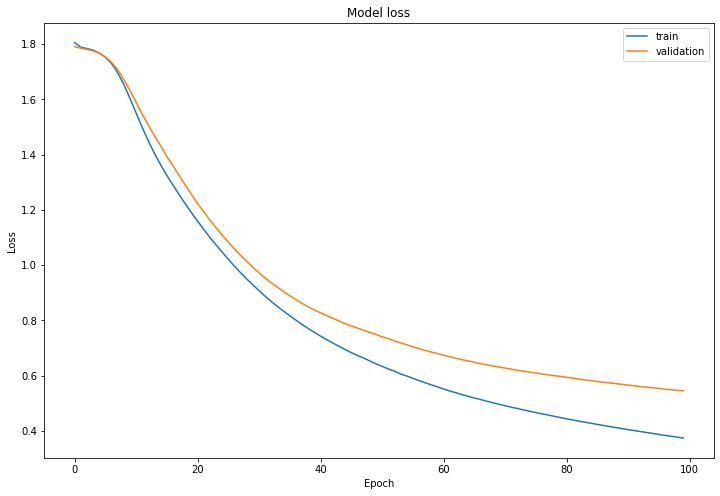

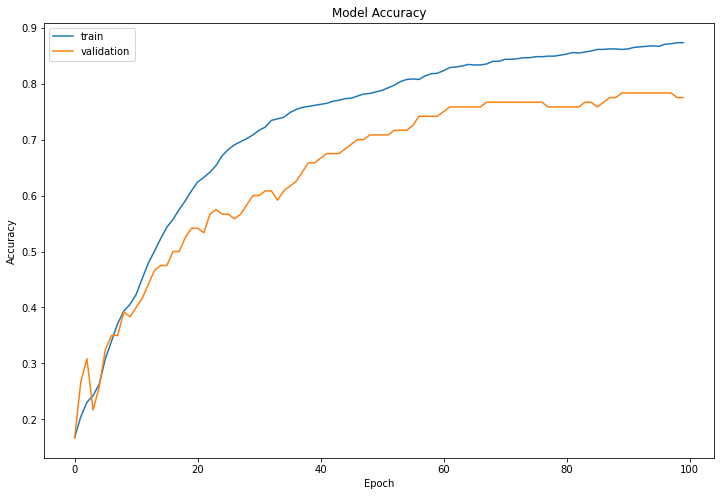

In [18]:
# The history.history["loss"] entry is a dictionary with as many values as epochs that the
# model was trained on. 
df_loss_acc = pd.DataFrame(history.history)
df_loss= df_loss_acc[['loss','val_loss']]
df_loss.rename(columns={'loss':'train','val_loss':'validation'},inplace=True)
df_acc= df_loss_acc[['accuracy','val_accuracy']]
df_acc.rename(columns={'accuracy':'train','val_accuracy':'validation'},inplace=True)
df_loss.plot(title='Model loss',figsize=(12,8)).set(xlabel='Epoch',ylabel='Loss')
df_acc.plot(title='Model Accuracy',figsize=(12,8)).set(xlabel='Epoch',ylabel='Accuracy')